In [ ]:
# Image Data Generator - helps to read the images only when required (while modelling)
# Example - We are building a Dogs-Vs-Cat model with 25K images and Batch_size of 32
# At any give point of time, the DL model will operate only on 32 images, so why should we read
# all 25K images and store them in RAM(& further bring OOM - Out of Memory)

# Image Data Generator - actually helps you to read only sufficeint images, required
# for modelling at any given point of time

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, cv2
import tensorflow as tf
from tqdm.auto import tqdm

In [ ]:
# IDG works on a specific folder structure -
# Master Folder
#   |- Cats
#       |- cat.001.jpg
#       |- cat.002.jpg
#       |- cat.003.jpg
#       ...
#   |- Dogs
#       |- dog.001.jpg
#       |- dog.002.jpg
#       |- dog.003.jpg
#       ...

In [ ]:
! mkdir -p /root/.kaggle
! mv kaggle.json /root/.kaggle
import kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 97% 788M/812M [00:06<00:00, 202MB/s]
100% 812M/812M [00:06<00:00, 127MB/s]


In [ ]:
! unzip -q dogs-vs-cats.zip

In [ ]:
! unzip -q train.zip

In [ ]:
! rm test1.zip sampleSubmission.csv

In [ ]:
# Current Folder Structure
# train
#   |- dog.001.jpg
#   |- cat.001.jpg
#   |- dog.002.jpg
#   |- cat.002.jpg
#   |- dog.003.jpg
#   |- cat.003.jpg

In [ ]:
# New Folder Structure
# images
#   |- cat
#       |- cat.001.jpg
#       |- cat.002.jpg
#       |- cat.003.jpg
#   |- dog
#       |- dog.001.jpg
#       |- dog.002.jpg
#       |- dog.003.jpg

In [ ]:
# any command that start with ! is actully not a PYHTON command, it is a LINUX command

In [ ]:
! mkdir images
# os.mkdir("images")

In [ ]:
! mkdir images/cat
# os.mkdir("images/cat")

In [ ]:
! mkdir images/dog
# os.mkdir("images/dog")

In [ ]:
# we need to now copy all cat images from train folder and paste it in images/cat folder
# we need to now copy all dog images from train folder and paste it in images/dog folder

In [ ]:
import shutil # lib will help you with copy command

In [ ]:
source = "train/"
dest_dog = "images/dog"
dest_cat = "images/cat"

for imageName in tqdm(os.listdir(source)):
  #imageName - filename of images present in train folder
  if imageName.startswith("cat"):
    shutil.copy(source + imageName, dest_cat)
  elif imageName.startswith("dog"):
    shutil.copy(source + imageName, dest_dog)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
len(os.listdir(dest_cat)) # count the num of files in images/cat folder

12500

In [ ]:
len(os.listdir("images/dog"))

12500

In [ ]:
# images
#   |- cat
#       |- cat.001.jpg
#       |- cat.002.jpg
#       |- cat.003.jpg
#       |- ...
#   |- dog
#       |- dog.001.jpg
#       |- dog.002.jpg
#       |- dog.003.jpg
#       |- ...

In [ ]:
! rm -rf train # remove the folder

In [ ]:
! rm dogs-vs-cats.zip train.zip

In [ ]:
# image Data generator
idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                      validation_split=0.1)

In [ ]:
batch_size = 32

In [ ]:
train_idg = idg.flow_from_directory('images', target_size=(150, 150),
                                    batch_size = batch_size,
                                    subset="training")

Found 22500 images belonging to 2 classes.


In [ ]:
val_idg = idg.flow_from_directory('images',
                                  target_size=(150, 150),
                                  batch_size = batch_size,
                                  subset="validation")

Found 2500 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((150, 150, 3), name="Input")) #67500
model.add(tf.keras.layers.Flatten(name="Flat"))
model.add(tf.keras.layers.Dense(128, activation='relu', name="HL1"))
model.add(tf.keras.layers.Dense(16, activation='relu', name="HL2"))
model.add(tf.keras.layers.Dense(2, activation='softmax', name="Output"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flat (Flatten)              (None, 67500)             0         
                                                                 
 HL1 (Dense)                 (None, 128)               8640128   
                                                                 
 HL2 (Dense)                 (None, 16)                2064      
                                                                 
 Output (Dense)              (None, 2)                 34        
                                                                 
Total params: 8642226 (32.97 MB)
Trainable params: 8642226 (32.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics = ["acc"])

In [ ]:
model.fit(train_idg, batch_size=batch_size, epochs=15,
          validation_data=val_idg)

Epoch 1/15
704/704 [==============================] - 107s 150ms/step - loss: 0.6961 - acc: 0.5485 - val_loss: 0.6725 - val_acc: 0.5764
Epoch 2/15
704/704 [==============================] - 100s 142ms/step - loss: 0.6674 - acc: 0.5905 - val_loss: 0.6580 - val_acc: 0.6056
Epoch 3/15
704/704 [==============================] - 97s 137ms/step - loss: 0.6537 - acc: 0.6135 - val_loss: 0.6543 - val_acc: 0.6116
Epoch 4/15
704/704 [==============================] - 101s 144ms/step - loss: 0.6446 - acc: 0.6264 - val_loss: 0.6509 - val_acc: 0.6100
Epoch 5/15
704/704 [==============================] - 99s 140ms/step - loss: 0.6365 - acc: 0.6336 - val_loss: 0.6694 - val_acc: 0.6016


KeyboardInterrupt: ignored

In [ ]:
# Download image from URL
! wget https://www.hindustantimes.com/ht-img/img/2023/08/25/1600x900/international_dog_day_1692974397743_1692974414085.jpg

--2023-10-21 16:20:42--  https://www.hindustantimes.com/ht-img/img/2023/08/25/1600x900/international_dog_day_1692974397743_1692974414085.jpg
Resolving www.hindustantimes.com (www.hindustantimes.com)... 23.33.29.10, 23.33.29.13, 2600:1407:3c00:29::1721:1d0a, ...
Connecting to www.hindustantimes.com (www.hindustantimes.com)|23.33.29.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘international_dog_day_1692974397743_1692974414085.jpg’

international_dog_d     [ <=>                ] 103.24K  --.-KB/s    in 0.02s   

2023-10-21 16:20:42 (4.86 MB/s) - ‘international_dog_day_1692974397743_1692974414085.jpg’ saved [105720]



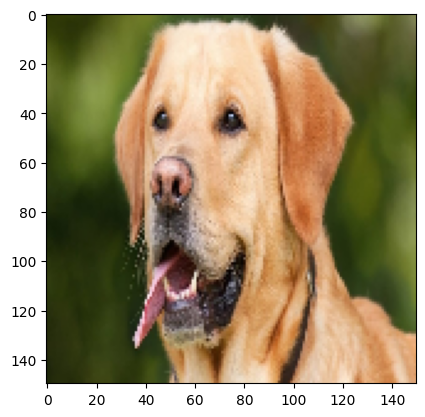

In [ ]:
test_image = cv2.imread("international_dog_day_1692974397743_1692974414085.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (150, 150))
plt.imshow(test_image)

In [ ]:
test_image.shape

(150, 150, 3)

In [ ]:
model.input_shape

(None, 150, 150, 3)

In [ ]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 150, 150, 3)

In [ ]:
test_image = test_image / 255.0

In [ ]:
model.predict(test_image)

1/1 [==============================] - 0s 33ms/step


array([[0.27946493, 0.7205351 ]], dtype=float32)

In [ ]:
train_idg.class_indices

{'cat': 0, 'dog': 1}